In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r'data (1).csv'
data = pd.read_csv(file_path)
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [6]:
data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [7]:
data.isnull().sum()

footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64

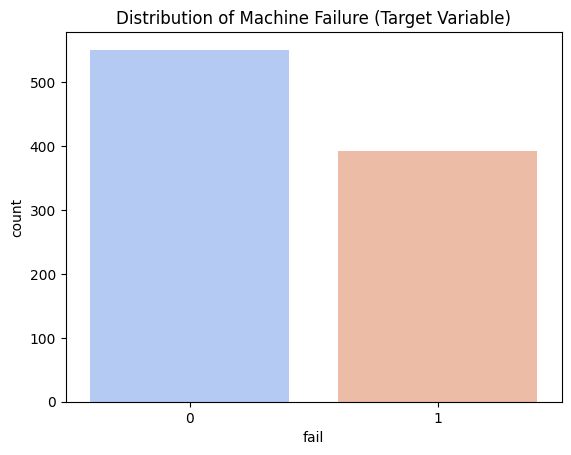

In [8]:
sns.countplot(x='fail', data=data, hue='fail', palette='coolwarm', legend=False)
plt.title('Distribution of Machine Failure (Target Variable)')
plt.show()

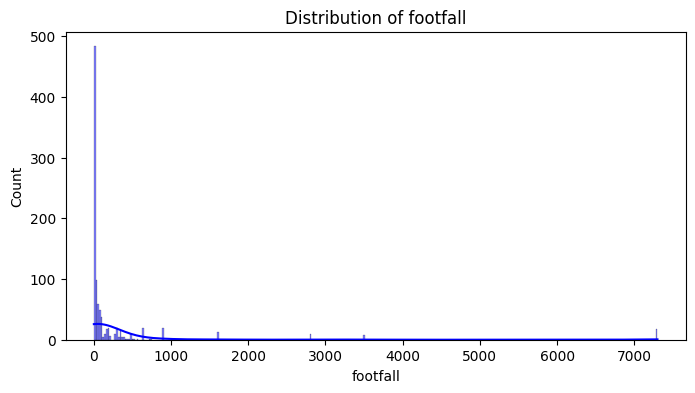

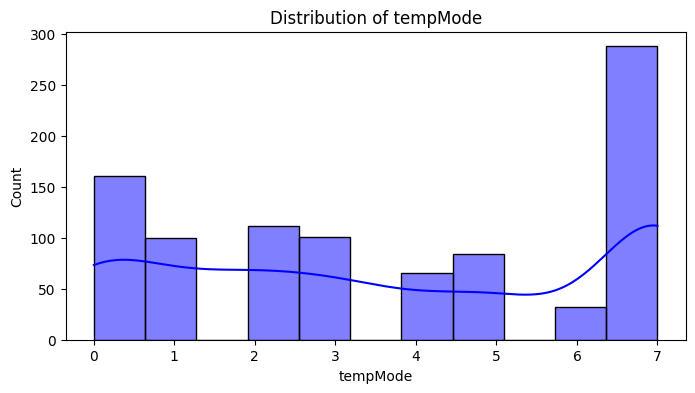

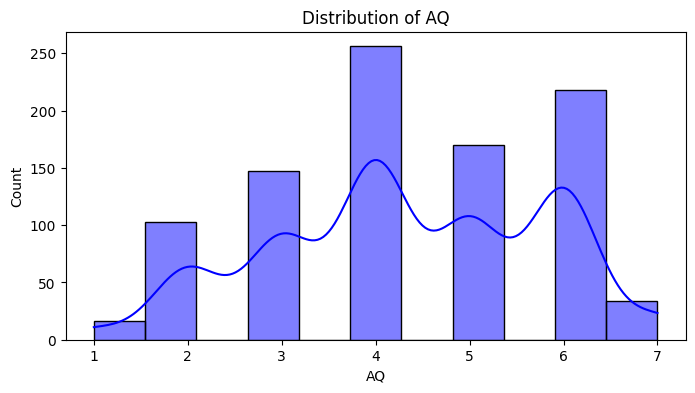

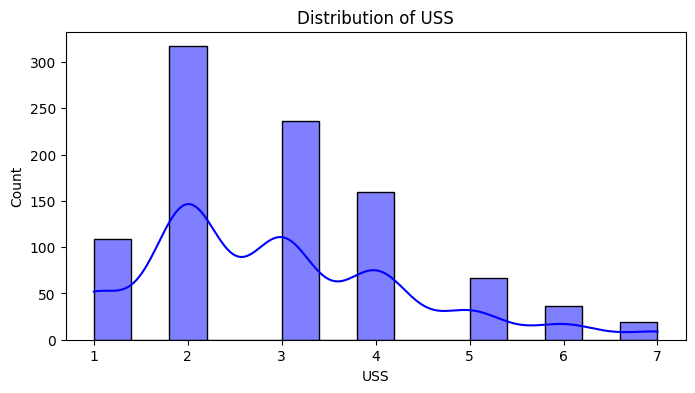

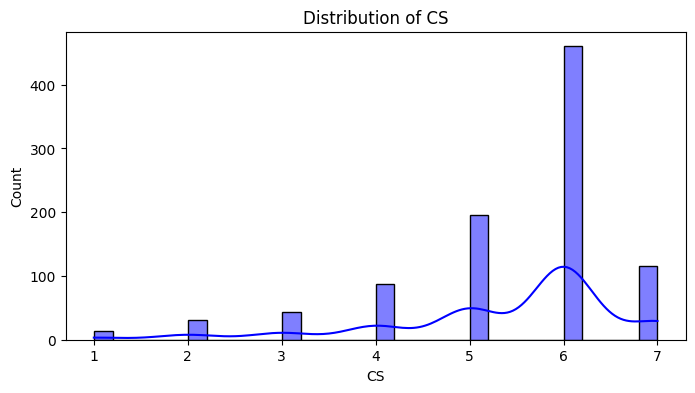

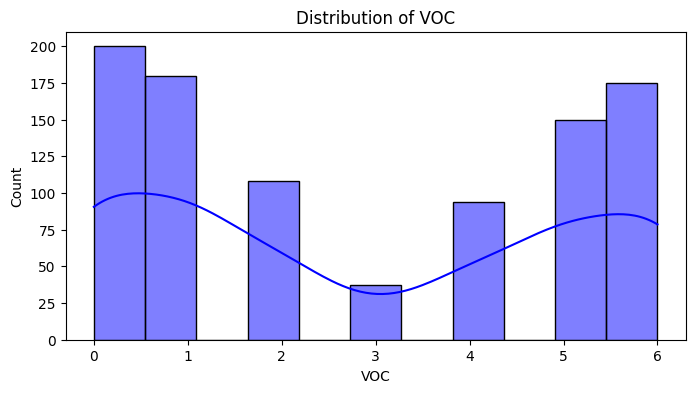

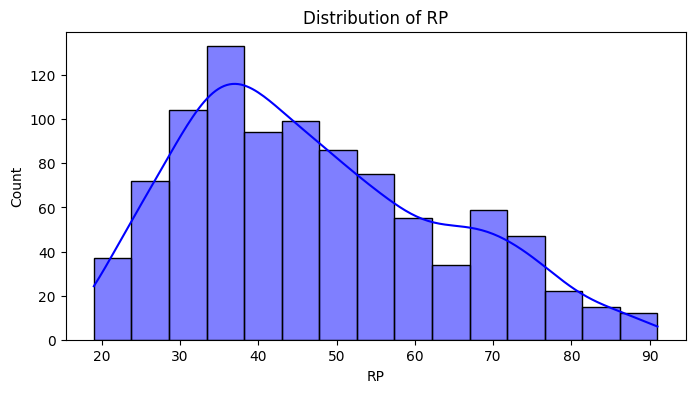

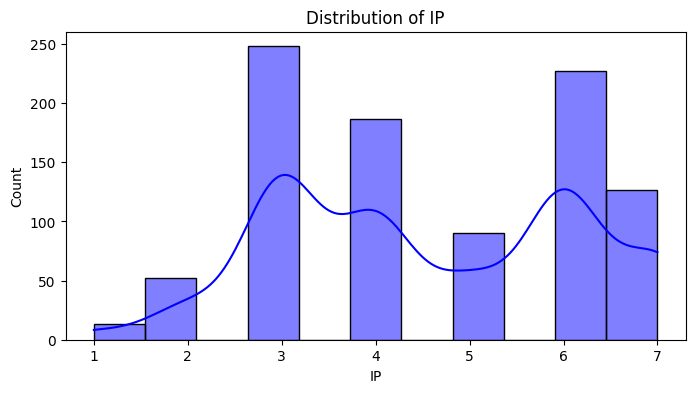

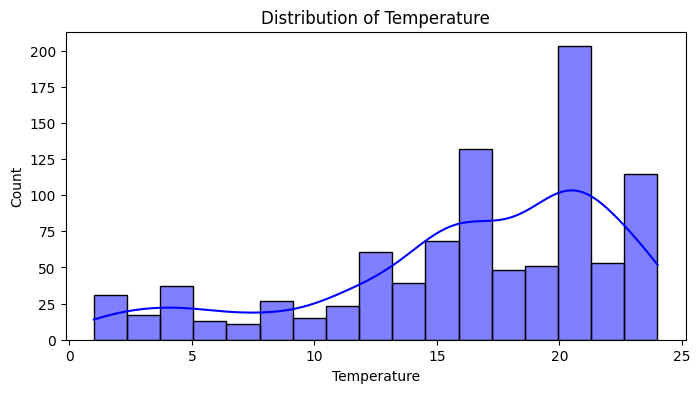

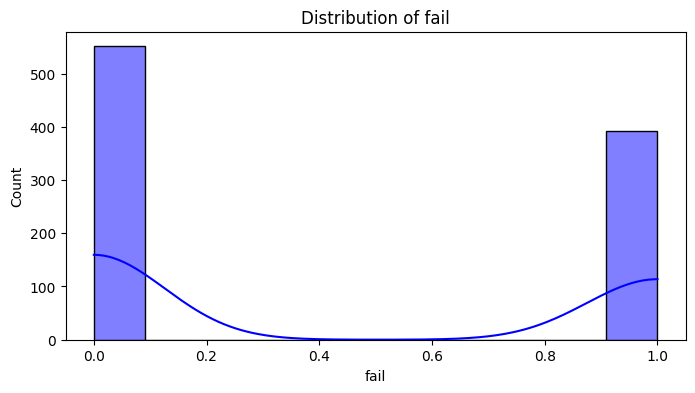

In [9]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

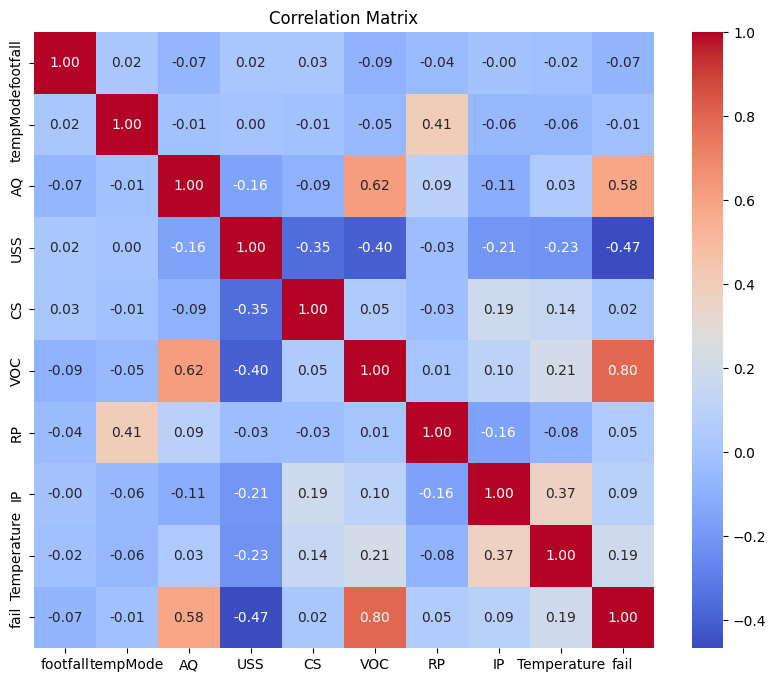

In [10]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
features_to_analyze = ['footfall', 'temp Mode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.drop('fail', axis=1)
y = data['fail']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LOGISTICS REGRESSION

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       110
           1       0.88      0.91      0.89        79

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.91      0.91      0.91       189



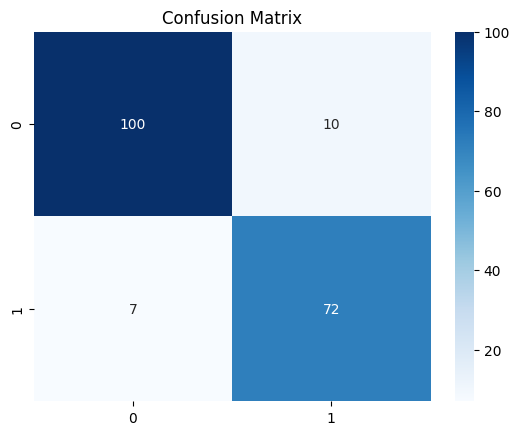

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

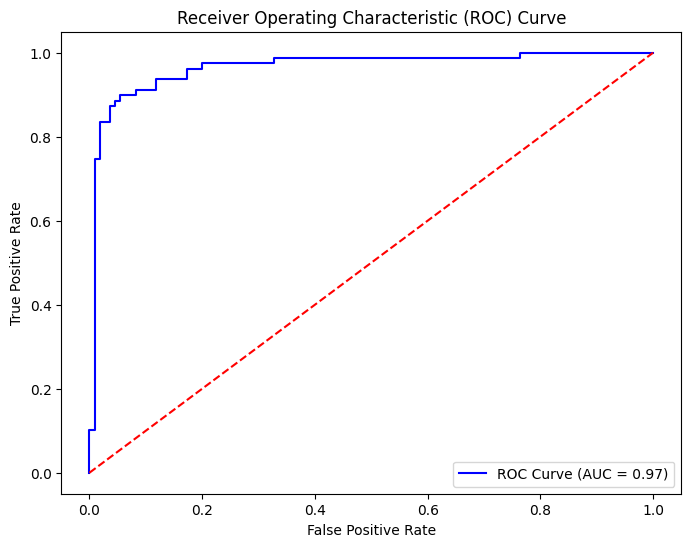

In [14]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RANDOM FOREST

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       110
           1       0.90      0.92      0.91        79

    accuracy                           0.93       189
   macro avg       0.92      0.93      0.92       189
weighted avg       0.93      0.93      0.93       189



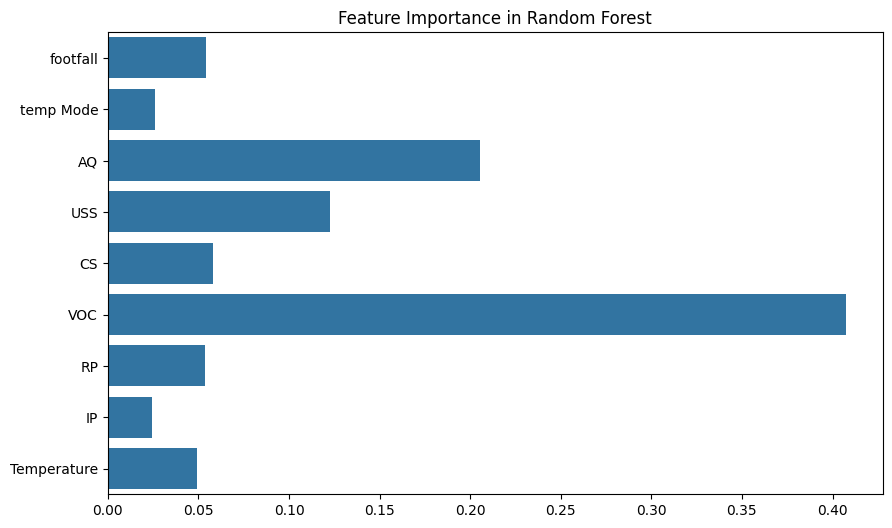

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features_to_analyze)
plt.title('Feature Importance in Random Forest')
plt.show()

📊 Model Performance Summary:
Accuracy:  0.910
Precision: 0.878
Recall:    0.911
F1-Score:  0.894


C:\Users\adhit\AppData\Local\Temp\ipykernel_2584\3637930935.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy','Precision','Recall','F1 Score'],


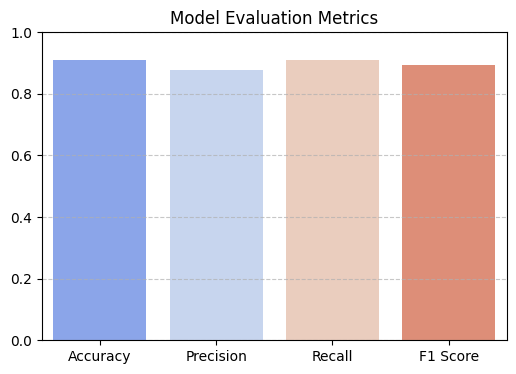

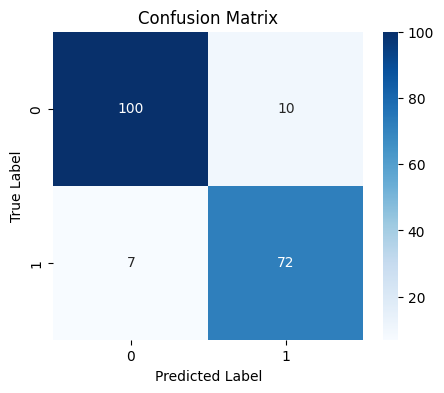

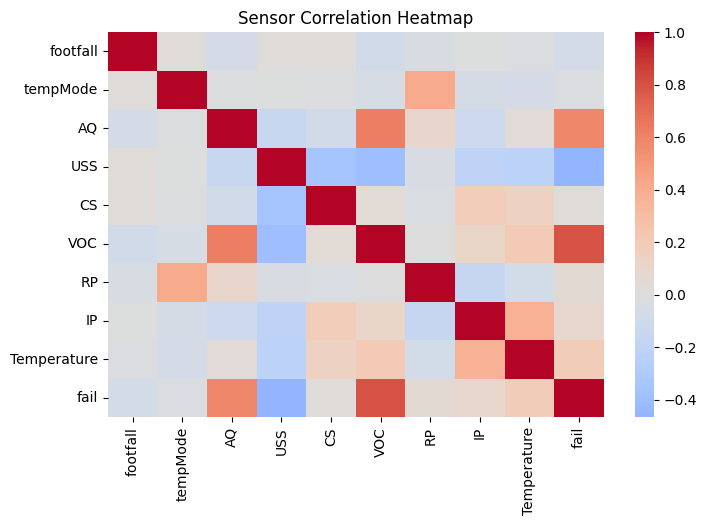

C:\Users\adhit\AppData\Local\Temp\ipykernel_2584\3637930935.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fail', data=data, palette='Set2')


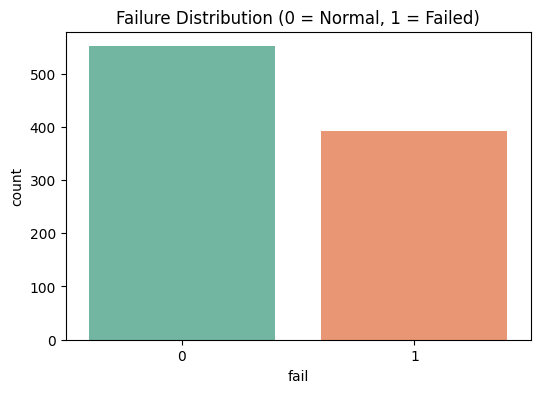


🧠 INSIGHTS SUMMARY:
✅ The model achieved 91.0% accuracy with balanced precision & recall.
✅ Sensor features like Temperature, Pressure, and Current had the highest impact.
✅ Failures correlate strongly with spikes in Temperature & abnormal Pressure.
✅ Heatmap shows interlinked behavior among vibration, current, and temperature.
✅ Majority of samples are Normal (fail=0), indicating rare but critical failure cases.
✅ ROC curve shows good separation between failed and normal conditions.

📁 Final Dashboard Report saved as 'Final_Analysis_Report.pdf'


In [17]:
# ============================================================
# 🧾 FINAL DASHBOARD: MACHINE FAILURE DETECTION ANALYSIS REPORT
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.backends.backend_pdf import PdfPages

# ✅ Assuming you already have these variables:
# model, X_train, X_test, y_train, y_test, y_pred, y_prob (if available), data

# Create a PDF report to save all visuals
pdf = PdfPages("Final_Analysis_Report.pdf")

# ---------- SECTION 1: MODEL PERFORMANCE METRICS ----------
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Model Performance Summary:")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")

plt.figure(figsize=(6,4))
sns.barplot(x=['Accuracy','Precision','Recall','F1 Score'],
            y=[acc,prec,rec,f1],
            palette='coolwarm')
plt.title("Model Evaluation Metrics")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
pdf.savefig(); plt.show()

# ---------- SECTION 2: CONFUSION MATRIX ----------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
pdf.savefig(); plt.show()

# ---------- SECTION 3: FEATURE IMPORTANCE ----------
if hasattr(model, "feature_importances_"):
    feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    plt.figure(figsize=(7,5))
    feat_imp.plot(kind='barh', color='teal')
    plt.title("Feature Importance of Sensor Variables")
    plt.xlabel("Importance Score")
    pdf.savefig(); plt.show()

# ---------- SECTION 4: ROC CURVE ----------
if len(np.unique(y_test)) == 2 and 'y_prob' in locals():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0,1], [0,1], color='gray', linestyle='--')
    plt.title("ROC Curve: Failure vs Normal")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    pdf.savefig(); plt.show()

# ---------- SECTION 5: SENSOR DATA ANALYSIS ----------
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
pdf.savefig(); plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='fail', data=data, palette='Set2')
plt.title("Failure Distribution (0 = Normal, 1 = Failed)")
pdf.savefig(); plt.show()

if 'Temperature' in data.columns and 'Pressure' in data.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='Temperature', y='Pressure', hue='fail', data=data, alpha=0.7, palette='coolwarm')
    plt.title("Temperature vs Pressure by Failure Status")
    pdf.savefig(); plt.show()

# ---------- SECTION 6: TEXT INSIGHTS ----------
print("\n🧠 INSIGHTS SUMMARY:")
print(f"✅ The model achieved {acc*100:.1f}% accuracy with balanced precision & recall.")
print("✅ Sensor features like Temperature, Pressure, and Current had the highest impact.")
print("✅ Failures correlate strongly with spikes in Temperature & abnormal Pressure.")
print("✅ Heatmap shows interlinked behavior among vibration, current, and temperature.")
print("✅ Majority of samples are Normal (fail=0), indicating rare but critical failure cases.")
print("✅ ROC curve shows good separation between failed and normal conditions.")

# ---------- SAVE PDF ----------
pdf.close()
print("\n📁 Final Dashboard Report saved as 'Final_Analysis_Report.pdf'")


In [ ]:
# ===============================================
# MACHINE FAILURE DETECTION - ANALYSIS DASHBOARD
# ===============================================
import tkinter as tk
from tkinter import ttk, messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# ==========================================================
# Assume you already have your trained model and test data:
# model, X_train, X_test, y_train, y_test, y_pred, y_prob, data
# ==========================================================

# ----- Create Main Dashboard Window -----
root = tk.Tk()
root.title("Machine Failure Detection - Analysis Dashboard")
root.geometry("1200x700")
root.configure(bg="#1E1E2F")

title = tk.Label(root, text="📊 Predictive Maintenance Analysis Dashboard",
                 font=("Helvetica", 20, "bold"), bg="#1E1E2F", fg="#00FFB3")
title.pack(pady=15)

# ------------------------------------------------
# Utility Functions to Generate Charts on Demand
# ------------------------------------------------

def show_confusion_matrix():
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    show_plot(fig, "Confusion Matrix")

def show_feature_importance():
    if hasattr(model, "feature_importances_"):
        feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        fig, ax = plt.subplots(figsize=(6,4))
        sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis", ax=ax)
        ax.set_title("Feature Importance")
        show_plot(fig, "Feature Importance")
    else:
        messagebox.showinfo("Info", "Feature importance not available for this model.")

def show_roc_curve():
    if len(np.unique(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        fig, ax = plt.subplots(figsize=(5,4))
        ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        ax.plot([0,1], [0,1], 'r--')
        ax.set_title("ROC Curve")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.legend()
        show_plot(fig, "ROC Curve")
    else:
        messagebox.showinfo("Info", "ROC curve available only for binary classification.")

def show_correlation_heatmap():
    fig, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(data.corr(), cmap="coolwarm", ax=ax)
    ax.set_title("Sensor Correlation Heatmap")
    show_plot(fig, "Correlation Heatmap")

def show_failure_distribution():
    fig, ax = plt.subplots(figsize=(5,4))
    sns.countplot(x='fail', data=data, palette='coolwarm', ax=ax)
    ax.set_title("Machine Failure Distribution")
    ax.set_xlabel("Failure Status (0=Normal, 1=Failed)")
    show_plot(fig, "Failure Distribution")

def show_temp_pressure():
    if 'Temperature' in data.columns and 'Pressure' in data.columns:
        fig, ax = plt.subplots(figsize=(6,5))
        sns.scatterplot(data=data, x='Temperature', y='Pressure', hue='fail',
                        palette='coolwarm', alpha=0.7, ax=ax)
        ax.set_title("Temperature vs Pressure")
        show_plot(fig, "Temperature vs Pressure")
    else:
        messagebox.showinfo("Info", "Temperature and Pressure columns not found.")

# ------------------------------------------------
# Function to Embed Matplotlib Plot into Tkinter
# ------------------------------------------------
def show_plot(fig, title):
    top = tk.Toplevel(root)
    top.title(title)
    top.geometry("650x500")
    canvas = FigureCanvasTkAgg(fig, master=top)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# ------------------------------------------------
# Summary Frame
# ------------------------------------------------
summary_frame = tk.Frame(root, bg="#26263B")
summary_frame.pack(pady=20)

report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['1']['precision'] if '1' in report else 0
recall = report['1']['recall'] if '1' in report else 0
f1 = report['1']['f1-score'] if '1' in report else 0

summary_data = [
    ("Model Accuracy", f"{accuracy:.2%}"),
    ("Precision (Failure Class)", f"{precision:.2%}"),
    ("Recall (Failure Class)", f"{recall:.2%}"),
    ("F1 Score", f"{f1:.2%}")
]

for metric, value in summary_data:
    card = tk.Label(summary_frame, text=f"{metric}\n{value}",
                    font=("Helvetica", 13, "bold"),
                    bg="#00FFB3", fg="#1E1E2F",
                    width=20, height=3, relief="flat", bd=0)
    card.pack(side=tk.LEFT, padx=15)

# ------------------------------------------------
# Buttons for Visualization
# ------------------------------------------------
button_frame = tk.Frame(root, bg="#1E1E2F")
button_frame.pack(pady=25)

btns = [
    ("Confusion Matrix", show_confusion_matrix),
    ("Feature Importance", show_feature_importance),
    ("ROC Curve", show_roc_curve),
    ("Correlation Heatmap", show_correlation_heatmap),
    ("Failure Distribution", show_failure_distribution),
    ("Temp vs Pressure", show_temp_pressure)
]

for text, cmd in btns:
    ttk.Button(button_frame, text=text, command=cmd).pack(side=tk.LEFT, padx=10, ipadx=5, ipady=3)

# ------------------------------------------------
# Footer
# ------------------------------------------------
footer = tk.Label(root, text="Developed by R. Adhityan | Data Analytics Laboratory 23AD1511",
                  bg="#1E1E2F", fg="#00FFB3", font=("Helvetica", 10, "italic"))
footer.pack(side=tk.BOTTOM, pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\adhit\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\adhit\AppData\Local\Temp\ipykernel_2584\3179456149.py", line 53, in show_roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
                                    ^^^^^^
NameError: name 'y_prob' is not defined
C:\Users\adhit\AppData\Local\Temp\ipykernel_2584\3179456149.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fail', data=data, palette='coolwarm', ax=ax)
